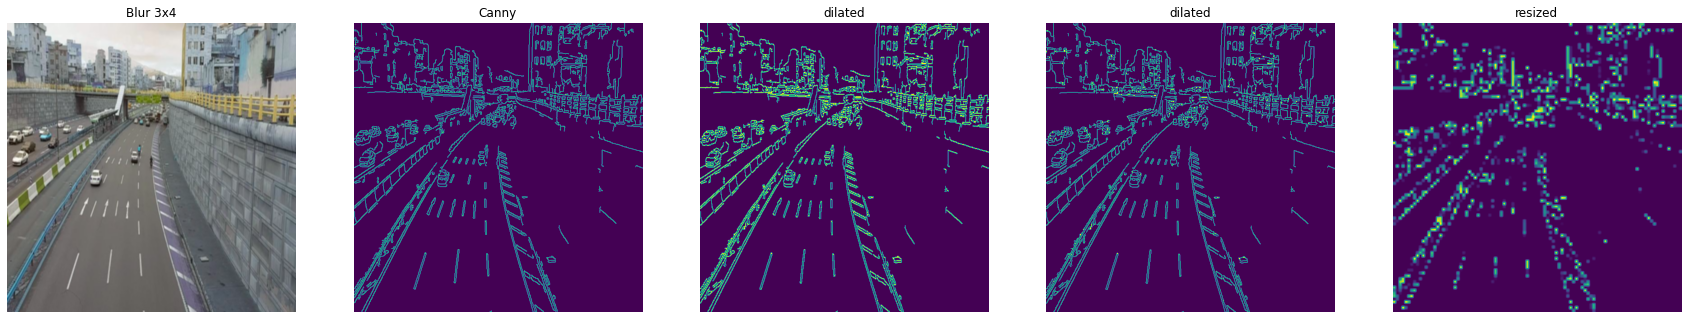

In [1]:
import cv2 as cv
import os
from matplotlib import pyplot as plt

imgs = []

# read all images in folder and subfolders
folder = "./No_Apply_Grayscale"
for root, dirs, files in os.walk(folder):
    for file in files:
        if file.endswith(".jpg"):
            imgs.append(cv.imread(os.path.join(root, file)))

img = imgs[5]
fig = plt.figure(figsize=(30,30))


blur = cv.blur(img, (3, 4))

fig.add_subplot(1,5, 1)
plt.title(f"Blur 3x4")
plt.imshow(blur)
plt.axis("off")


Canny = cv.Canny(blur, 100, 200)

fig.add_subplot(1,5, 2)
plt.title(f"Canny")
plt.imshow(Canny)
plt.axis("off")

dilated = cv.dilate(Canny, (3, 4), iterations=1)

fig.add_subplot(1,5, 3)
plt.title(f"dilated")
plt.imshow(dilated)
plt.axis("off")

eroded = cv.erode(dilated, (3, 4), iterations=1)

fig.add_subplot(1,5, 4)
plt.title(f"dilated")
plt.imshow(eroded)
plt.axis("off")

resized = cv.resize(eroded, (100, 100))

fig.add_subplot(1,5, 5)
plt.title(f"resized")
plt.imshow(resized)
plt.axis("off")
plt.show()

# for i in range(0,len(nimgs)):
#     fig.add_subplot(5, 2, i+1)

#     plt.imshow(nimgs[i])
#     plt.axis("off")
# plt.show()



# k = cv.waitKey(0)  # Wait for a keystroke in the window
# capture = cv.VideoCapture("SampleVideo_LowQuality.mp4")

# while True:
#     isTrue, frame = capture.read()
#     cv.imshow("Video", frame)

#     if cv.waitKey(20) & 0xFF == ord("d"):
#         break

# capture.release()
# cv.destroyAllWindows()

# # cv.imshow("Display window", imgs[0])
# # k = cv.waitKey(0)  # Wait for a keystroke in the window


Number of contours = 484


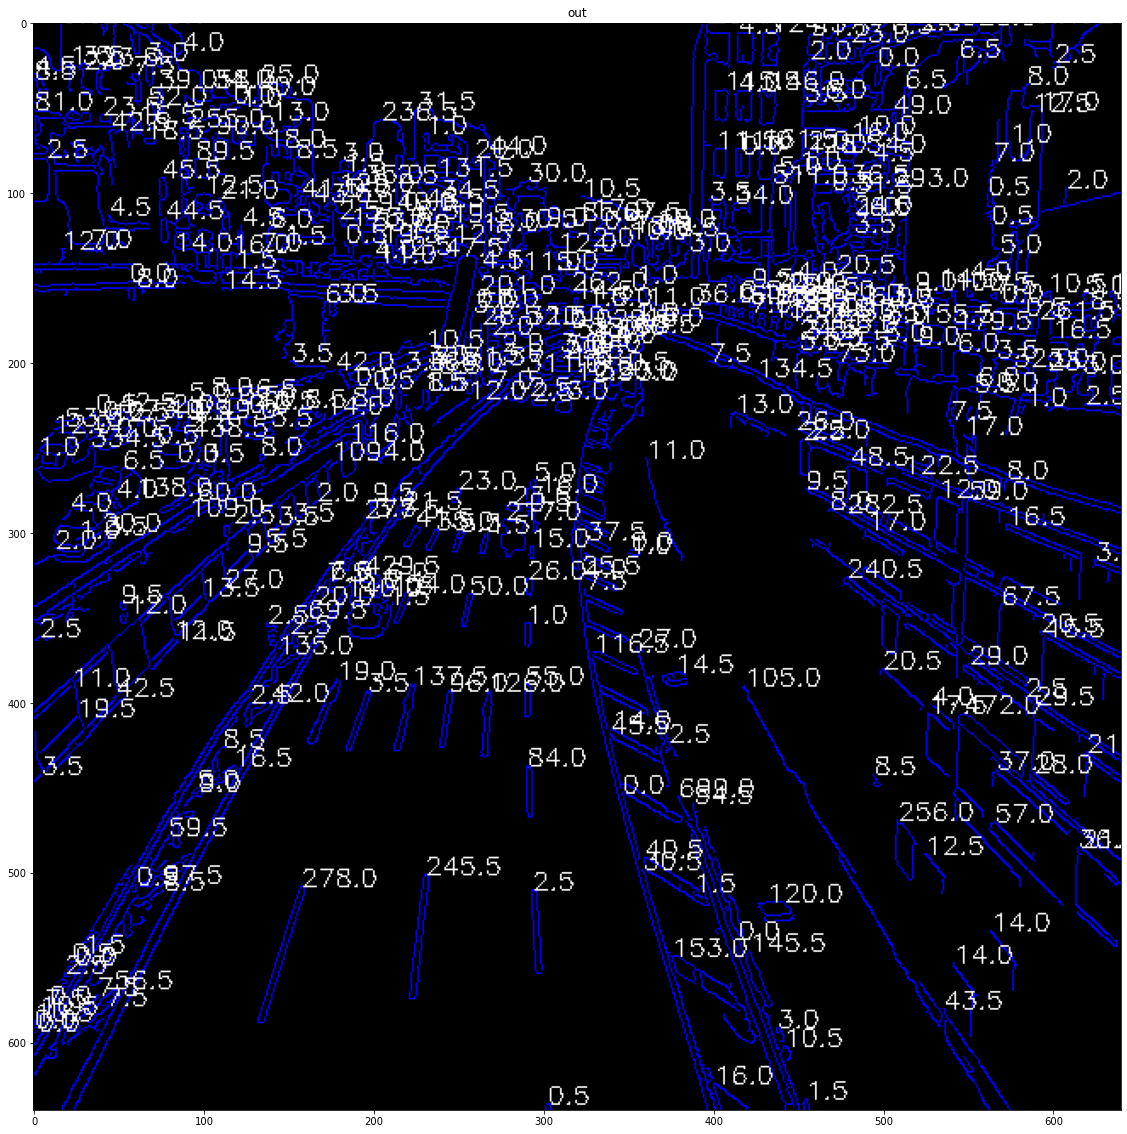

In [2]:
img = imgs[5]
fig = plt.figure(figsize=(20,20))


# detect contours

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5, 5), 0)
canny = cv.Canny(blur, 50, 150)
contours, hierarchies = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(f"Number of contours = {len(contours)}")



# with contours you can do
# - draw contours
# - calculate area
# - calculate perimeter
# - calculate centroid
# - calculate bounding box
# - calculate minimum enclosing circle

# create pure black image
blank = img.copy()
blank[:] = 0

out = cv.drawContours(blank, contours, -1, (0, 0, 255), 1)
# fig.add_subplot(1,1, 1)
# plt.title(f"out")
# plt.imshow(out)
# plt.axis("off")
# plt.show()

# calulate area of contours and diplay alongside image
for i, contour in enumerate(contours):
    area = cv.contourArea(contour)
    cv.putText(out, f"{area}", (int(contour[0][0][0]), int(contour[0][0][1])), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

fig.add_subplot(1,1, 1)
plt.title(f"out")
plt.imshow(out)




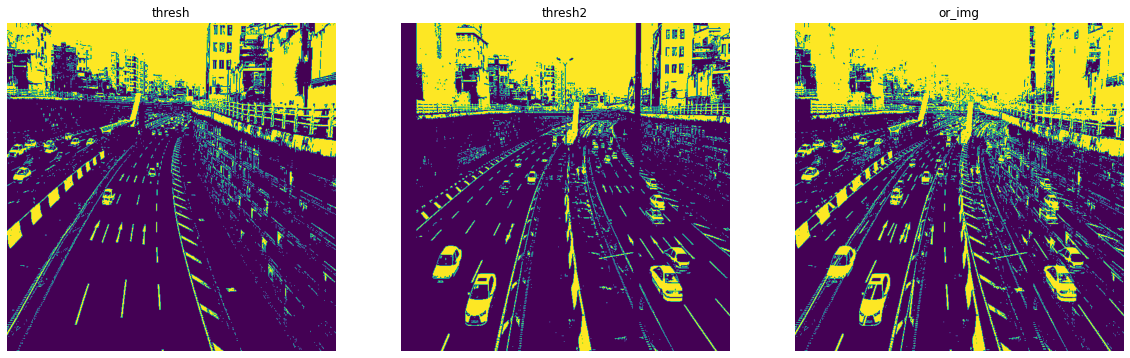

In [3]:
import cv2
import numpy as np

fig = plt.figure(figsize=(20,20))

# threshold imgs[5] and imgs[6], then show
gray = cv.cvtColor(imgs[5], cv.COLOR_BGR2GRAY)
_, thresh = cv.threshold(gray, 140, 255, cv.THRESH_BINARY)
fig.add_subplot(1,3, 1)
plt.title(f"thresh")
plt.imshow(thresh)
plt.axis("off")

gray = cv.cvtColor(imgs[10], cv.COLOR_BGR2GRAY)
_, thresh2 = cv.threshold(gray, 130, 255, cv.THRESH_BINARY)

def translate(image, x, y):
    # Define the translation matrix
    M = np.float32([[1, 0, x], [0, 1, y]])

    # Apply the translation to the image
    translated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    return translated_image


thresh2 = translate(thresh2, +30, 0)

fig.add_subplot(1,3, 2)
plt.title(f"thresh2")
plt.imshow(thresh2)
plt.axis("off")

# calculate OR
or_img = cv.bitwise_or(thresh, thresh2)
fig.add_subplot(1,3, 3)
plt.title(f"or_img")
plt.imshow(or_img)
plt.axis("off")

# show ful screen in cv imshow


plt.show()


(640, 640, 3)


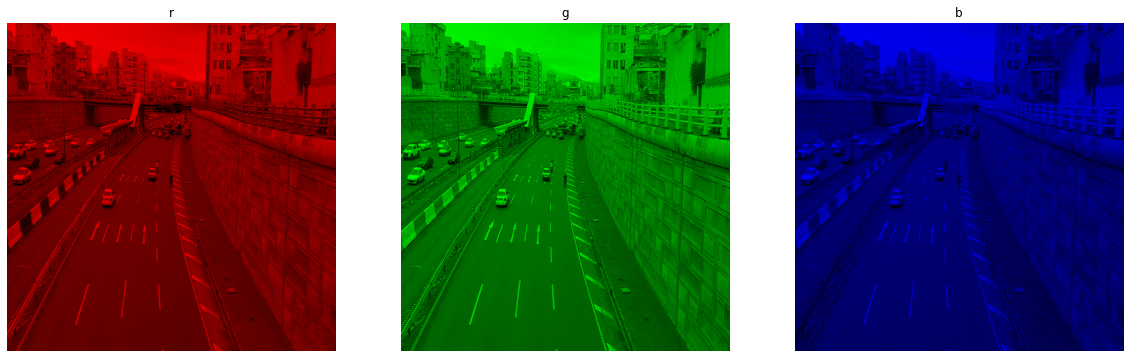

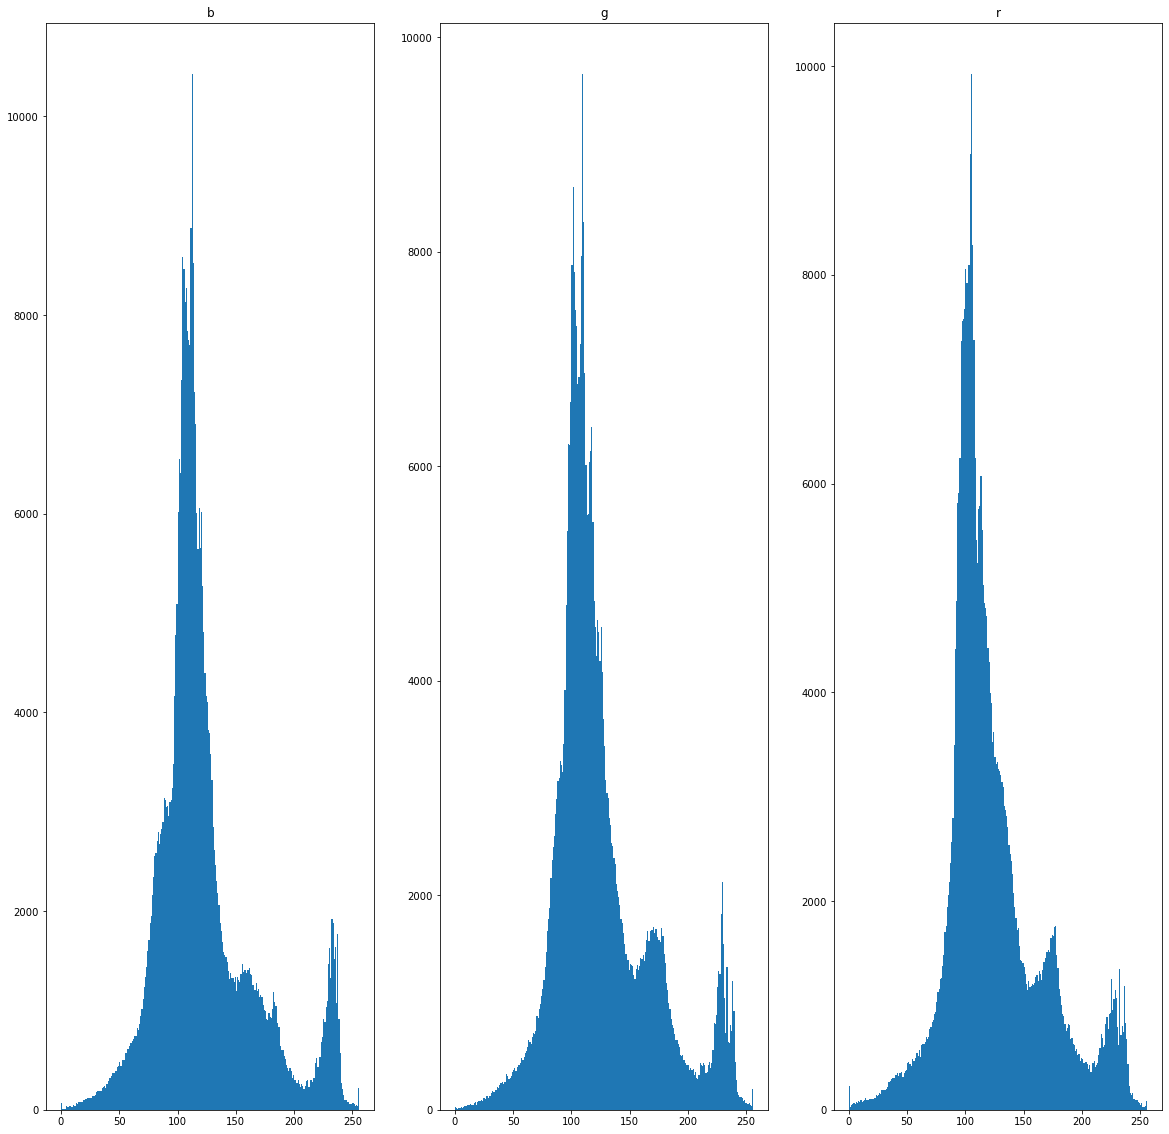

In [4]:
img = imgs[5]

# separate image in colors
b, g, r = cv.split(img)

print(img.shape)

blank = np.zeros((640,640), dtype="uint8")

# show image in plt with custom size

fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,3, 1)
plt.title(f"r")
plt.imshow(cv.merge([r, blank, blank,  ]))
plt.axis("off")

fig.add_subplot(1,3, 2)
plt.title(f"g")
plt.imshow(cv.merge([blank,g, blank ]))
plt.axis("off")

fig.add_subplot(1,3, 3)
plt.title(f"b")
plt.imshow(cv.merge([blank, blank, b]))
plt.axis("off")

#  draw  image histogram for 3 colors
fig2 = plt.figure(figsize=(20,20))
fig2.add_subplot(1,3, 1)
plt.title(f"b")
plt.hist(b.ravel(), 256, [0, 256])

fig2.add_subplot(1,3, 2)
plt.title(f"g")
plt.hist(g.ravel(), 256, [0, 256])

fig2.add_subplot(1,3, 3)
plt.title(f"r")
plt.hist(r.ravel(), 256, [0, 256])

plt.show()



In [1]:

from matplotlib import pyplot as plt
import cv2
import numpy as np


# Open the input video
def resize_video(input_path, output_path, max_height):
    # Open the video file
    video = cv2.VideoCapture(input_path)

    # Get the original video's width and height
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Calculate the new width and height while maintaining the aspect ratio
    aspect_ratio = width / height
    new_height = max_height
    new_width = int(new_height * aspect_ratio)

    # Create a VideoWriter object to save the resized video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    output_video = cv2.VideoWriter(output_path, fourcc, 30.0, (new_width, new_height))

    while True:
        # Read a frame from the video
        ret, frame = video.read()

        if not ret:
            break

        # Resize the frame
        resized_frame = cv2.resize(frame, (new_width, new_height))

        # Write the resized frame to the output video
        output_video.write(resized_frame)

    # Release the video objects
    video.release()
    output_video.release()

    return new_width, new_height

input_video_path = 'sample_red.mp4'
output_video_path = 'video_with_hist'
temp_output_path = 'temp_output_video.mp4'
max_height = 700
fps = 30.0
# frame_width, frame_height = resize_video(input_video_path, temp_output_path, max_height)

input_video = cv2.VideoCapture(temp_output_path)

print(frame_width, frame_height)

hist_size = 400

# Create a VideoWriter object to save the output video
fourcc2 = cv2.VideoWriter_fourcc(*'mpv4')
output_video = cv2.VideoWriter(output_video_path, fourcc2, 30.0, (frame_width, frame_height+hist_size))

# Check if the VideoWriter object has been successfully created
if not output_video.isOpened():
    print("Error: VideoWriter object couldn't be created.")
    # Release the video capture and writer objects
    input_video.release()
    output_video.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()
    exit(0)

# omit plt logs
plt.ioff()
    # abre stream do video de output como mp4

# abre stream do video de input

# Itera por cada frame do video
while input_video.isOpened():
    ret, frame = input_video.read()
    if not ret:
        break

    # extrai apenas a parte vermelha (formato BGR)
    red = frame[:, :, 2]

    # Calculate the sum of red values for each column
    red_hist = np.sum(red_img, axis=0)

    plt.figure(figsize=(10,2))
    plt.plot(red_hist.flatten())
    plt.savefig("temp_hist.png")
    plt.clf()
    hist_img = cv2.imread("temp_hist.png")

    hist_img = cv2.resize(hist_img, (frame_width, hist_size))

    frame = cv2.copyMakeBorder(frame, 0, 0, 200, 160, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    
    # resize frame to frame_width
    frame = cv2.resize(frame, (frame_width, frame_height))
    
    output_frame = np.vstack((frame, hist_img))
    
    # Write the output frame to the output video
    output_video.write(output_frame)
    
    # Display the output frame
    cv2.imshow('Output Video', output_frame)

    tok = 100//3
    tfast = 1

    # ...
    
    # Press 'q' to stop the video processing
    if cv2.waitKey(tfast) & 0xFF == ord('q'):
        break

cv2.waitKey(10)

# Release the video capture and writer objects
input_video.release()
output_video.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


NameError: name 'frame_width' is not defined

In [1]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('bookcase.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

cv2.imshow('Canny', edges)
cv2.waitKey(0)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

# Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# Initialize an image to draw the lines
line_image = np.copy(image) * 0  # creating a blank to draw lines on

# Filter and draw lines
for line in lines:
    for x1, y1, x2, y2 in line:
        if abs(y2 - y1) < 10:  # Horizontal line filter
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 10)

# Superimpose lines on the original image
combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

# Display the result
cv2.imshow('Detected Center-lines', combo_image)
cv2.waitKey(0)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

In [11]:
x = np.array([[[1,2],[1, 2]], [[1, 2],[1, 2]]])
a,b = x[:,:,2]
print(a)
print(b)

IndexError: index 2 is out of bounds for axis 2 with size 2

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('origimg.png')

# Filtros para máscara (lembre-se a ordem é BLUE, GREEN, RED)
lower = np.array([0, 0, 0])  
upper = np.array([220, 150, 255])

# Aplica máscara para intervalos dados
mask = cv2.inRange(image, lower, upper)

# Processo para limpar aglomerados errados na máscara 
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Substitui pixels da imagem original na máscara
filtered = cv2.bitwise_and(image, image, mask=mask)

# Mostra as duas imagens
cv2.imshow('Original Image', image)
cv2.imshow('Segmented Image', filtered)

if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/renato/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [5]:
# Converte a imagem pra cinza
gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)

# Aplica threshold para binarizar a imagem
_, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

# Encontra os contornos
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# show countours
# cv2.drawContours(filtered, contours, -1, (0, 255, 0), 2)
# cv2.imshow('Contours', filtered)
# if cv2.waitKey(0) & 0xFF == ord('q'):
#     cv2.destroyAllWindows()

# Procura bounding box a partir do maior contorno da imagem
x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))

# Desenha uma bounding box na imagem original
cv2.rectangle(filtered, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('Bounding Box', filtered)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()